In [1]:
#Rebekah Vinson
#09252019
#Unit_05_Matplotlib


# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np


# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

# Files to Load
clinical_data = "Panda_Panda/clinicaltrial_data_1.csv"
mouse_data = "Panda_Panda/mouse_drug_data_1.csv"

# Read Mouse and Drug Data and the Clinical Trial Data
clinical_data = pd.read_csv(clinical_data)
mouse_data = pd.read_csv(mouse_data)


# Combine the data into a single dataset. Use 'merge', left join and  Mouse ID as the unique identifier.
mouse_clinical_trial = pd.merge(clinical_data, mouse_data,how="left",on="Mouse ID")
mouse_clinical_trial.head()


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug
0,b128,0,45.0,0,Capomulin
1,f932,0,45.0,0,Ketapril
2,g107,0,45.0,0,Ketapril
3,a457,0,45.0,0,Ketapril
4,c819,0,45.0,0,Ketapril


## Tumor Response to Treatment

In [2]:
# Store the Mean "Tumor Volume Data" Grouped by Drug and Timepoint 
trial_group_mean = mouse_clinical_trial.groupby(["Drug","Timepoint"]).mean()
trial_group_mean.reset_index(inplace = True)


In [3]:
# Convert to DataFrame
tumor_response_treatmnt_mean = pd.DataFrame(trial_group_mean)

# Preview DataFrame 
tumor_response_treatmnt_mean.head()

,Drug,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,Capomulin,0,45.000000,0.000000
1,Capomulin,5,44.266086,0.160000
2,Capomulin,10,43.084291,0.320000
3,Capomulin,15,42.064317,0.375000
4,Capomulin,20,40.716325,0.652174


In [4]:
# Store the Standard Error of Tumor Volumes Grouped by Drug and Timepoint
trial_group_sem = mouse_clinical_trial.groupby(["Drug","Timepoint"]).sem()
trial_group_sem.reset_index(inplace = True)

# Convert to DataFrame
tumor_response_treatmnt_sem = pd.DataFrame(trial_group_sem)

# Preview DataFrame 
tumor_response_treatmnt_sem.head()



,Drug,Timepoint,Metastatic Sites,Mouse ID,Tumor Volume (mm3)
0,Capomulin,0,0.000000,NaN,0.000000
1,Capomulin,5,0.074833,NaN,0.448593
2,Capomulin,10,0.125433,NaN,0.702684
3,Capomulin,15,0.132048,NaN,0.838617
4,Capomulin,20,0.161621,NaN,0.909731


In [5]:
#Use a pivot table for data munging: DataFrame.pivot(index='Index',columns='Columns', values='Values')
#Reset index
pivot_table = tumor_response_treatmnt_mean.pivot(index ="Timepoint", columns = 'Drug', values = "Tumor Volume (mm3)")
pivot_table.reset_index(inplace = True)

#Preview the formatted table
pivot_table.head()




Drug,Timepoint,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
0,0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
1,5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
2,10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
3,15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
4,20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334


In [6]:
#view table_drugs - sub table
table_drugs = pivot_table[["Timepoint", "Capomulin", "Infubinol", "Ketapril","Placebo"]]
table_drugs.head()

Drug,Timepoint,Capomulin,Infubinol,Ketapril,Placebo
0,0,45.000000,45.000000,45.000000,45.000000
1,5,44.266086,47.062001,47.389175,47.125589
2,10,43.084291,49.403909,49.582269,49.423329
3,15,42.064317,51.296397,52.399974,51.359742
4,20,40.716325,53.197691,54.920935,54.364417


In [7]:
#testing table_drugs.plot(x=)

In [8]:
# testing ploting pandas not using matplotlib 
#drugsonly = table_drugs[['Capomulin','Infubinol', 'Ketapril', 'Placebo']]
#drugsonly.plot.line()


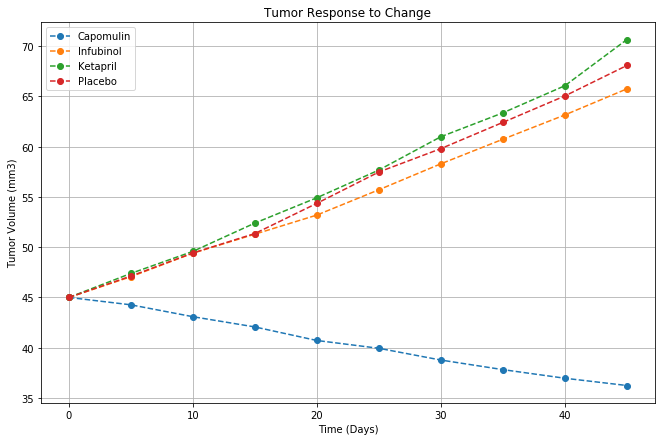

In [9]:
# Generate the Plot (with Error Bars)
plt.figure(figsize = (11, 7))

#fig=table_drugs.plot(kind='scatter', x='Timepoint',y='Capomulin', linestyle='--', color='red', marker='o',yerr = Capomulin_error);

plt.errorbar(x=table_drugs['Timepoint'],y=table_drugs['Capomulin'], yerr=None, linestyle="--", fmt='o')
plt.errorbar(x=table_drugs['Timepoint'],y=table_drugs['Infubinol'], yerr=None, linestyle="--", fmt='o')
plt.errorbar(x=table_drugs['Timepoint'],y=table_drugs['Ketapril'], yerr=None, linestyle="--", fmt='o')
plt.errorbar(x=table_drugs['Timepoint'],y=table_drugs['Placebo'], yerr=None, linestyle="--", fmt='o')

plt.legend(['Capomulin','Infubinol','Ketapril','Placebo'])

plt.ylabel('Tumor Volume (mm3)')
plt.xlabel('Time (Days)')
plt.title('Tumor Response to Change')
plt.grid()
   
plt.show()


In [10]:
# same chart with loop
# table_drugs.Timepoint

#for drugs in table_drugs:
#   plt.errorbar(drugs, y = drugs)
    #print(drugs)



![Tumor Response to Treatment](../Images/treatment.png)

## Metastatic Response to Treatment

In [11]:
# Store the Mean Met. Site Data Grouped by Drug and Timepoint 
met_resp_mean= mouse_clinical_trial.groupby(["Drug","Timepoint"]).mean()


# Convert to DataFrame
met_response_treatmnt_mean = pd.DataFrame(met_resp_mean["Metastatic Sites"])

# Preview DataFrame 
met_response_treatmnt_mean.head()

Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.160000
          10                 0.320000
          15                 0.375000
          20                 0.652174

In [12]:
# Store the Standard Error associated with Met. Sites Grouped by Drug and Timepoint 
met_resp_sem = mouse_clinical_trial.groupby(["Drug","Timepoint"]).sem()

# Convert to DataFrame
met_response_treatmnt_sem = pd.DataFrame(met_resp_sem)

# Preview DataFrame
met_response_treatmnt_sem.head()


Metastatic Sites  Mouse ID  Tumor Volume (mm3)
Drug      Timepoint                                                
Capomulin 0                  0.000000       NaN            0.000000
          5                  0.074833       NaN            0.448593
          10                 0.125433       NaN            0.702684
          15                 0.132048       NaN            0.838617
          20                 0.161621       NaN            0.909731

In [13]:
# Store the mean mestastic response - grouped by Drug and Timepoint 
met_response_treatmnt_mean.reset_index(inplace = True)
met_response_treatmnt_meanB = pd.DataFrame(trial_group_mean)

# Use a pivot table for data munging
pivot_table_met = met_response_treatmnt_meanB.pivot(index ="Timepoint", columns = 'Drug', values = "Metastatic Sites")
pivot_table_met.reset_index(inplace = True)

#Preview the formatted table
pivot_table_met.head()


Drug,Timepoint,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
0,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,5,0.160000,0.380952,0.280000,0.304348,0.260870,0.375000,0.320000,0.120000,0.240000,0.166667
2,10,0.320000,0.600000,0.666667,0.590909,0.523810,0.833333,0.565217,0.250000,0.478261,0.500000
3,15,0.375000,0.789474,0.904762,0.842105,0.857143,1.250000,0.764706,0.333333,0.782609,0.809524
4,20,0.652174,1.111111,1.050000,1.210526,1.150000,1.526316,1.000000,0.347826,0.952381,1.294118


In [14]:
#view met_response_drugs - sub table
met_response_drugs = pivot_table_met[["Timepoint", "Capomulin", "Infubinol", "Ketapril","Placebo"]]
met_response_drugs.head()

Drug,Timepoint,Capomulin,Infubinol,Ketapril,Placebo
0,0,0.000000,0.000000,0.000000,0.000000
1,5,0.160000,0.280000,0.304348,0.375000
2,10,0.320000,0.666667,0.590909,0.833333
3,15,0.375000,0.904762,0.842105,1.250000
4,20,0.652174,1.050000,1.210526,1.526316


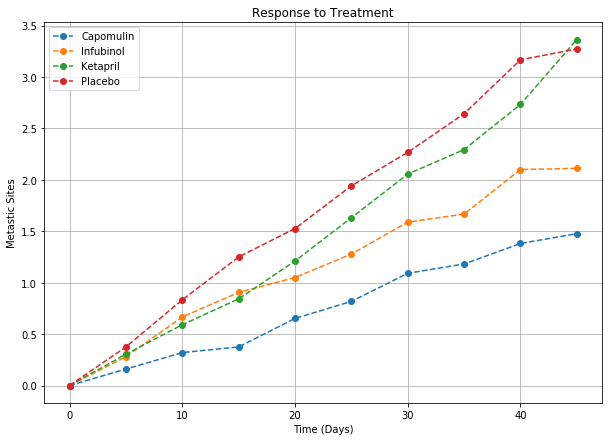

In [15]:
# Generate the Plot (with Error Bars)
plt.figure(figsize = (10, 7))

plt.errorbar(x=met_response_drugs['Timepoint'],y=met_response_drugs['Capomulin'], yerr=None, linestyle="--", fmt='o')
plt.errorbar(x=met_response_drugs['Timepoint'],y=met_response_drugs['Infubinol'], yerr=None, linestyle="--", fmt='o')
plt.errorbar(x=met_response_drugs['Timepoint'],y=met_response_drugs['Ketapril'], yerr=None, linestyle="--",fmt='o')
plt.errorbar(x=met_response_drugs['Timepoint'],y=met_response_drugs['Placebo'], yerr=None, linestyle="--", fmt='o')
plt.legend(['Capomulin','Infubinol','Ketapril','Placebo'])
plt.ylabel("Metastic Sites")
plt.xlabel('Time (Days)')
plt.title('Response to Treatment')
plt.grid()
# plt.legend('_nolegnd')       
plt.show()





![Metastatic Spread During Treatment](../Images/spread.png)

## Survival Rates

In [16]:
# Store the Count of Mice Grouped by Drug and Timepoint (W can pass any metric)
micect=mouse_clinical_trial.groupby(["Drug","Timepoint"]).count()

# Convert to DataFrame
mice_count=pd.DataFrame(micect["Mouse ID"])
mice_count.reset_index(inplace=True)

#Display dataframe
mice_count.head()



,Drug,Timepoint,Mouse ID
0,Capomulin,0,25
1,Capomulin,5,25
2,Capomulin,10,25
3,Capomulin,15,24
4,Capomulin,20,23


In [17]:
# Create pivot table count of mice - reset index
pivot_table_mice = mice_count.pivot(index ="Timepoint", columns = 'Drug', values = "Mouse ID")
pivot_table_mice.reset_index(inplace = True)

#Preview the formatted table
pivot_table_mice.head()


Drug,Timepoint,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
0,0,25,25,25,25,25,25,26,25,26,25
1,5,25,21,25,23,23,24,25,25,25,24
2,10,25,20,21,22,21,24,23,24,23,22
3,15,24,19,21,19,21,20,17,24,23,21
4,20,23,18,20,19,20,19,17,23,21,17


In [18]:
#View mice_count_table_drugs - subtable
mice_count_table_drugs = pivot_table_mice[["Timepoint", "Capomulin", "Infubinol", "Ketapril","Placebo"]]
mice_count_table_drugs.head()

Drug,Timepoint,Capomulin,Infubinol,Ketapril,Placebo
0,0,25,25,25,25
1,5,25,25,23,24
2,10,25,21,22,24
3,15,24,21,19,20
4,20,23,20,19,19


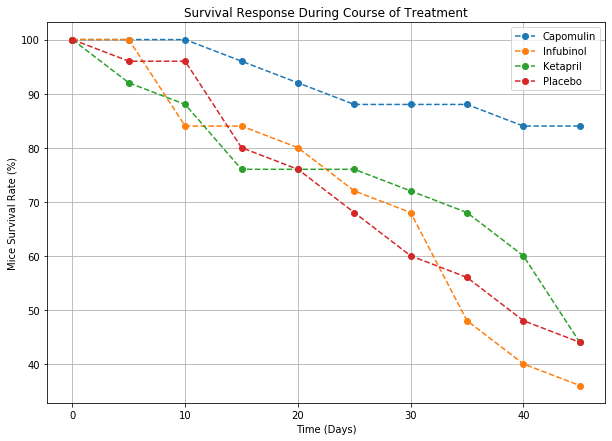

<Figure size 432x288 with 0 Axes>

In [19]:
#Calculations mice survival rate

survival_response_drugs = mice_count_table_drugs.astype(float)
survival_response_drugs["Capomulin_percent"]=survival_response_drugs["Capomulin"]/survival_response_drugs["Capomulin"].iloc[0] * 100
survival_response_drugs["Infubinol_percent"]=survival_response_drugs["Infubinol"]/survival_response_drugs["Infubinol"].iloc[0] * 100
survival_response_drugs["Ketapril_percent"]=survival_response_drugs["Ketapril"]/survival_response_drugs["Ketapril"].iloc[0] * 100
survival_response_drugs["Placebo_percent"]=survival_response_drugs["Placebo"]/survival_response_drugs["Placebo"].iloc[0] * 100
survival_response_drugs


# Generate the Plot (Accounting for percentages)
plt.figure(figsize = (10, 7))# Generate the Plot (Accounting for percentages)

plt.errorbar(x=survival_response_drugs ['Timepoint'],y=survival_response_drugs['Capomulin_percent'], linestyle="--", fmt='o')
plt.errorbar(x=survival_response_drugs['Timepoint'],y=survival_response_drugs['Infubinol_percent'], linestyle="--", fmt='o')
plt.errorbar(x=survival_response_drugs['Timepoint'],y=survival_response_drugs['Ketapril_percent'], linestyle="--",fmt='o')
plt.errorbar(x=survival_response_drugs['Timepoint'],y=survival_response_drugs['Placebo_percent'], linestyle="--", fmt='o')
plt.legend(['Capomulin','Infubinol','Ketapril', 'Placebo'])
plt.ylabel("Mice Survival Rate (%)")
plt.xlabel('Time (Days)')
plt.title('Survival Response During Course of Treatment')
plt.grid()
#plt.legend('_nolegnd')       
plt.show()
# Save the Figure
plt.savefig("../Survival_Respnse.png")


![Metastatic Spread During Treatment](../Images/survival.png)

## Summary Bar Graph

In [20]:
# Calculate the percent changes for drugs - for tuple -inherent
Capomulin_percent=(table_drugs["Capomulin"].iloc[9]-table_drugs["Capomulin"].iloc[0])/table_drugs["Capomulin"].iloc[0]*100
Infubinol_percent=(table_drugs["Infubinol"].iloc[9]-table_drugs["Infubinol"].iloc[0])/table_drugs["Infubinol"].iloc[0]*100
Ketapril_percent=(table_drugs["Ketapril"].iloc[9]-table_drugs["Ketapril"].iloc[0])/table_drugs["Ketapril"].iloc[0]*100
Placebo_percent=(table_drugs["Placebo"].iloc[9]-table_drugs["Placebo"].iloc[0])/table_drugs["Placebo"].iloc[0]*100
percent_change_tuple = {'Capomulin': Capomulin_percent, 'Infubinol': Infubinol_percent, 'Ketapril': Ketapril_percent, 'Placebo': Placebo_percent}
#All percent changes stored in tuple
tumor_volume_pct_change = pd.Series(percent_change_tuple)
tumor_volume_pct_change

Capomulin   -19.475303
Infubinol    46.123472
Ketapril     57.028795
Placebo      51.297960
dtype: float64

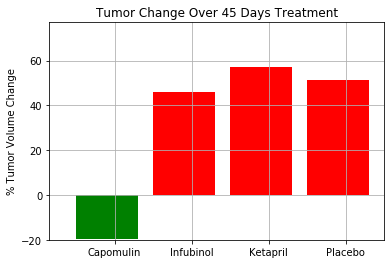

In [22]:
#Index the 4 drugs
trial_drugs = tumor_volume_pct_change.keys()
trial_drugs

#Summary Bar graph
summary_bar_graph = plt.subplot()
x_axis = np.arange(0, len(trial_drugs))

# Loop data - passing and failing drugs
# Position widths; labels, tick marks, etc. 
tick_locations = []
for x in x_axis:
    tick_locations.append(x + 0.5)
plt.xticks(tick_locations, trial_drugs)
colors = []
for value in tumor_volume_pct_change:
    if value >= 0 :
        colors.append('r')
    else:
        colors.append('g')
        
 #Plot Summary Change Bar Graph       
percent_change = summary_bar_graph.bar(x_axis, tumor_volume_pct_change, color=colors, align="edge")

plt.title("Tumor Change Over 45 Days Treatment")
plt.ylabel("% Tumor Volume Change")
plt.xlim(-0.35, len(trial_drugs))
plt.ylim(-20, max(tumor_volume_pct_change) + 20)
plt.grid()

plt.show()


In [ ]:
#Clinical Trial data has 1893 observations - there are additional columns that were not unique to the Mice data set. The mouse data set had Mouse (ID) and drug. There were 10 unique drugs used 25 times (random mouse ID).
#Because there are 1893 observations in the clinical trial dataset, there should be more than three drugs used in Pymaceuticals.
#For example, I completed the same homework with the addition of 'Ramicane'. Capomulin and Ramicane are close in percent on the scatter plots.
#However,in summary bar graph, Ramicane is -22% vs. Capomulin -19% tumer change over 45 days. Therefore it is worth noting for better data analysis, more drugs should be added. Please see Pymaceuticals_extra_drug